# Lección 2: Preparación de los Datos

# Lección 3: Funciones Básicas en GeoPandas

# Lección 4: Mapas

## Herramientas de Graficado y mapas

In [ ]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mex = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/DataSets/Mapa_mex/mexican-states.shp")

In [ ]:
mex.columns

Index(['ISO3166-2', 'admin_leve', 'boundary', 'is_in_coun', 'is_in_co_1',
       'name', 'name_en', 'name_es', 'name_pl', 'name_ru', 'name_uk', 'place',
       'ref', 'type', 'wikidata', 'wikipedia', 'geometry'],
      dtype='object')

In [ ]:
mex[["name","geometry"]].head(10)

,name,geometry
0,Aguascalientes,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,Colima,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,Ciudad de México,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."
5,México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0..."
6,Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564..."
7,Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381..."
8,Nuevo León,"POLYGON ((-99.94766 23.49713, -99.94611 23.490..."
9,Coahuila de Zaragoza,"POLYGON ((-103.50895 25.27801, -103.50984 25.2..."


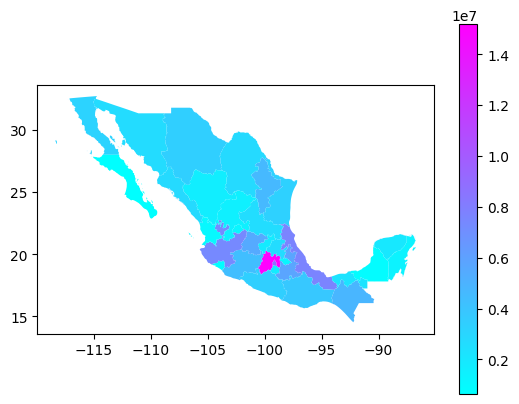

In [ ]:
inegi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Poblacion_2010.csv")
mex_mapa = mex[["name", "geometry"]]

mex_poblacion = pd.merge(mex_mapa, inegi, left_on="name", right_on="Entidad Federativa")
mex_poblacion = mex_poblacion[["name","Entidad Federativa", "geometry", "Total"]]

mex_poblacion.plot(column="Total", cmap="cool", legend=True);

<Axes: >

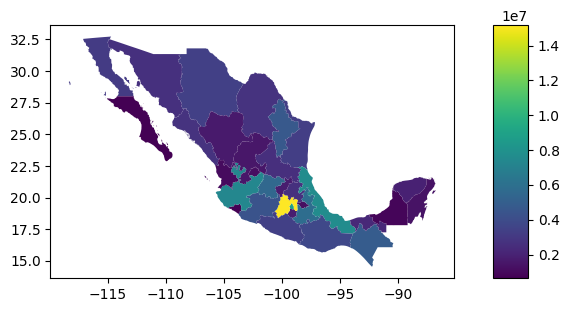

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="8%", pad = 0.2)

mex_poblacion.plot(column = "Total", ax=ax, legend = True, cax = cax)

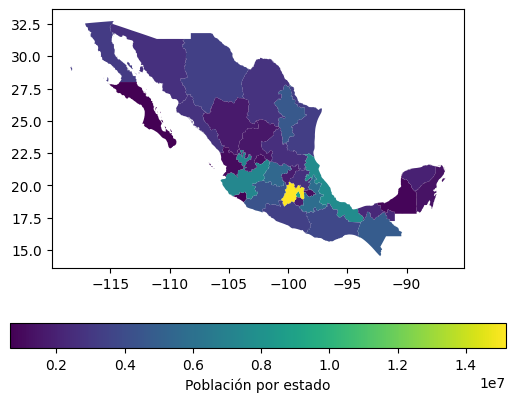

In [ ]:
fig, ax = plt.subplots(1,1)
mex_poblacion.plot(column = "Total", ax = ax, legend = True, legend_kwds=
                   {"label":"Población por estado", "orientation":"horizontal"});

## Capas

Usando plot y ax

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mex = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/DataSets/Mapa_mex/mexican-states.shp")
capitales = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/mexican-capitals.csv")
capitalesgeo = gpd.GeoDataFrame(capitales, geometry = geopandas.points_from_xy(capitales.Long, capitales.Lat))

# capitales = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/DataSets/mexican-capitals.csv")

capitalesgeo.head()

,Estado,Capital,Lat,Long,geometry
0,Aguascalientes,Aguascalientes,21.880833,-102.296111,POINT (-102.29611 21.88083)
1,Baja California,Mexicali,32.663333,-115.467778,POINT (-115.46778 32.66333)
2,Baja California Sur,La Paz,24.142222,-110.310833,POINT (-110.31083 24.14222)
3,Campeche,San Francisco de Campeche,19.848611,-90.525278,POINT (-90.52528 19.84861)
4,Chiapas,Tuxtla Gutiérrez,16.753056,-93.115556,POINT (-93.11556 16.75306)


Se asegura que ambos estén bajo el mismo sistema de referencia

<Axes: >

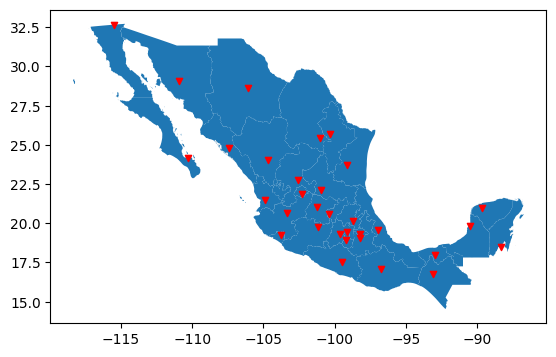

In [ ]:
capitalesgeo = capitalesgeo.set_crs(mex.crs)

#Se pinta la base
mapa = mex.plot()

#Se pintan las capitales
capitalesgeo.plot(ax=mapa, marker="v", color="red", markersize=20)

Usando Matplotlib

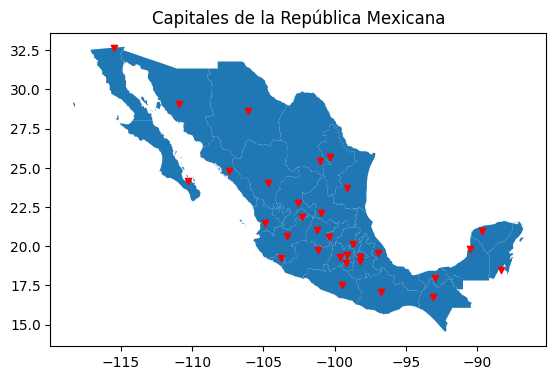

In [ ]:
# Como vamos a usar objetos de matplotlib es necesario importarlo
import matplotlib.pyplot as plt

# Creamos una sola figura y un subplot
fig, ax = plt.subplots()

# Le damos un título al mapa
ax.set_title('Capitales de la República Mexicana')

# El parámetro equal ajusta el tamaño de los ejes para que tengan
# una correspondencia de 1 a 1
ax.set_aspect('equal')

# Graficamos el mapa usando los ejes que definimos arriba
mex.plot(ax=ax)

# Graficamos las capitales usando los mismos ejes
capitalesgeo.plot(ax=ax, marker='v', color='red', markersize=20)

# Mostramos el mapa
plt.show();

Usando zorder

<Axes: >

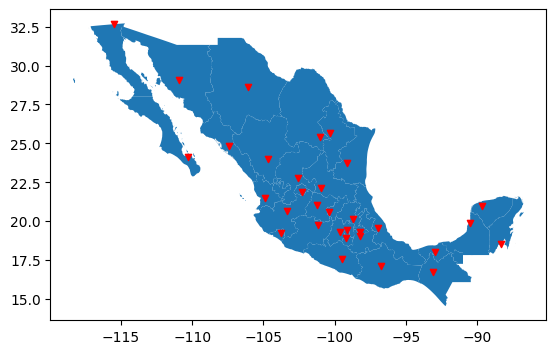

In [ ]:
#Se pintan las capitales
mapa = capitalesgeo.plot(marker="v", color="red", markersize=20, zorder=2)

#Se pinta la base
mex.plot(ax = mapa, zorder=1)

Más de un zorder

<Axes: >

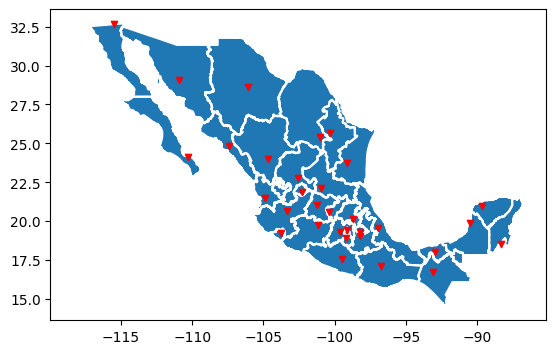

In [ ]:
#Se pintan las capitales
mapa = capitalesgeo.plot(marker="v", color="red", markersize=20, zorder=3)

#Se pinta la base
mex.plot(ax = mapa, zorder=1)

#Se pintan los bordes
mex.boundary.plot(color="white", ax = mapa, zorder = 2)

# Lección 5: Manipulaciones Geométricas

## Métodos Constructivos

.buffer

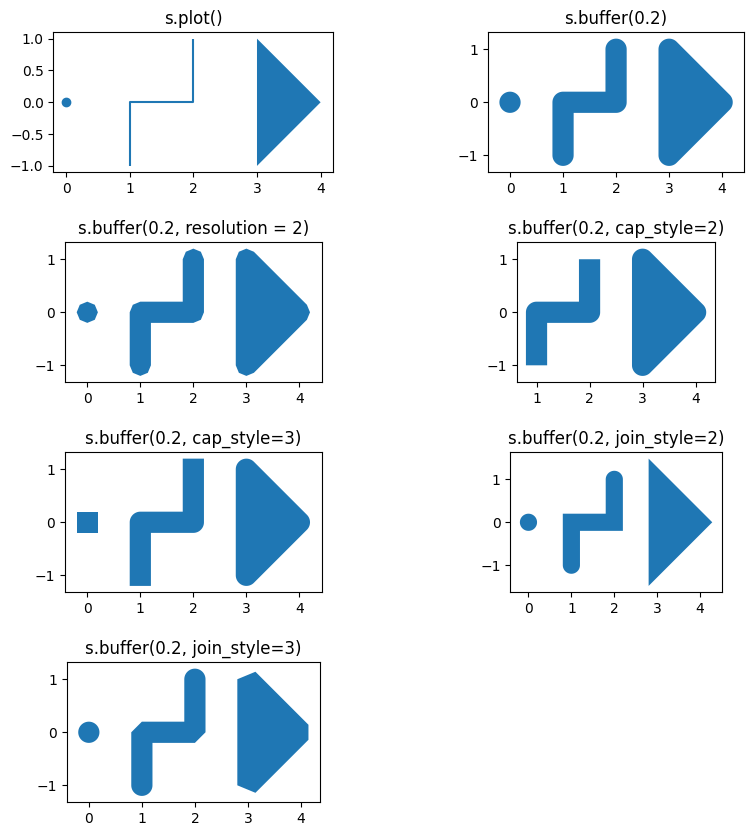

In [ ]:
from shapely.geometry import Point, LineString, Polygon

s = gpd.GeoSeries([Point(0,0),
                   LineString([(1,-1), (1,0), (2,0), (2,1)]),
                   Polygon([(3,-1), (4,0), (3,1)])])

fig, axs = plt.subplots(4,2, figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)

s.plot(ax = axs[0][0]);
axs[0][0].set_title("s.plot()");

s.buffer(0.2).plot(ax = axs[0][1]);
axs[0][1].set_title("s.buffer(0.2)");

s.buffer(0.2, resolution = 2).plot(ax = axs[1][0]);
axs[1][0].set_title("s.buffer(0.2, resolution = 2)");

s.buffer(0.2, cap_style=2).plot(ax = axs[1][1]);
axs[1][1].set_title("s.buffer(0.2, cap_style=2)");

s.buffer(0.2, cap_style=3).plot(ax = axs[2][0]);
axs[2][0].set_title("s.buffer(0.2, cap_style=3)");

s.buffer(0.2, join_style=2).plot(ax = axs[2][1]);
axs[2][1].set_title("s.buffer(0.2, join_style=2)");

s.buffer(0.2, join_style=3).plot(ax = axs[3][0]);
axs[3][0].set_title("s.buffer(0.2, join_style=3)");

fig.delaxes(axs[3][1])

.boundary

In [ ]:
s.boundary

0                             GEOMETRYCOLLECTION EMPTY
1       MULTIPOINT (1.00000 -1.00000, 2.00000 1.00000)
2    LINESTRING (3.00000 -1.00000, 4.00000 0.00000,...
dtype: geometry

<Axes: >

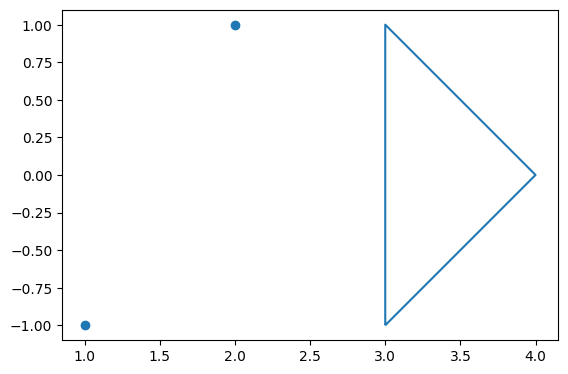

In [ ]:
s.boundary.plot()

.centroid

<Axes: >

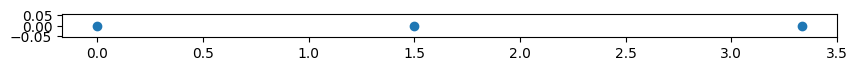

In [ ]:
s.centroid.plot(figsize=(10,0.5))

In [ ]:
s.centroid

0     POINT (0.00000 0.00000)
1     POINT (1.50000 0.00000)
2    POINT (3.33333 -0.00000)
dtype: geometry

.convex_hull

In [ ]:
s.convex_hull

0                              POINT (0.00000 0.00000)
1    POLYGON ((1.00000 -1.00000, 1.00000 0.00000, 2...
2    POLYGON ((3.00000 -1.00000, 3.00000 1.00000, 4...
dtype: geometry

<Axes: >

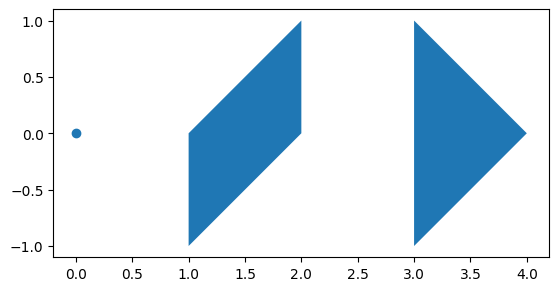

In [ ]:
s.convex_hull.plot()

.envelope

In [ ]:
s.envelope

0                              POINT (0.00000 0.00000)
1    POLYGON ((1.00000 -1.00000, 2.00000 -1.00000, ...
2    POLYGON ((3.00000 -1.00000, 4.00000 -1.00000, ...
dtype: geometry

<Axes: >

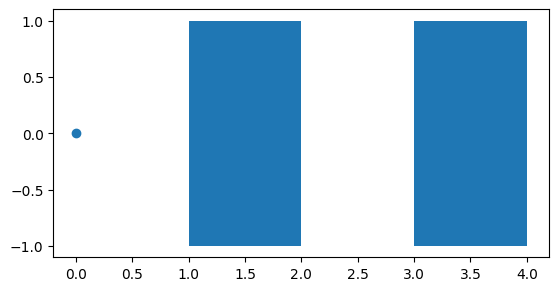

In [ ]:
s.envelope.plot()

.simplify()

In [ ]:
s.simplify(1)

0                              POINT (0.00000 0.00000)
1       LINESTRING (1.00000 -1.00000, 2.00000 1.00000)
2    POLYGON ((3.00000 -1.00000, 4.00000 0.00000, 3...
dtype: geometry

<Axes: >

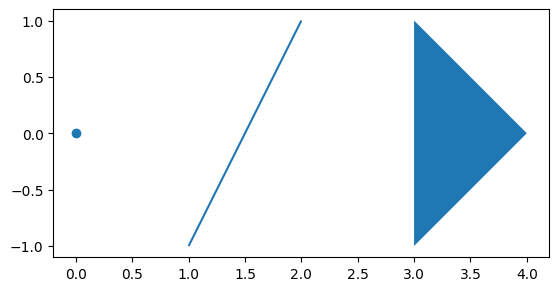

In [ ]:
s.simplify(1).plot()

.unary_union

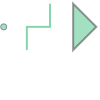

In [ ]:
s.unary_union

## Transformaciones

<Axes: >

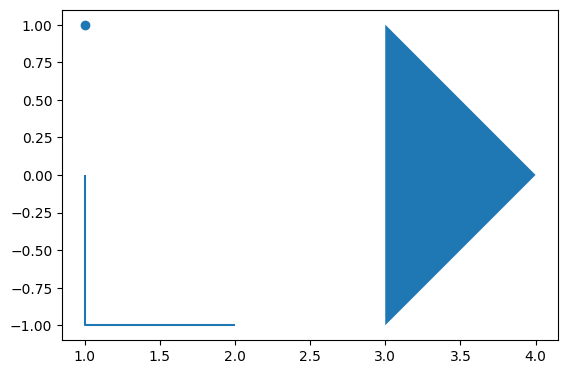

In [ ]:
s1 = gpd.GeoSeries([Point(1,1),
                    LineString([(2,-1),(1,-1),(1,0)]),
                    Polygon([(3,-1),(4,0),(3,1)])])

s1.plot()

.rotate

<Axes: >

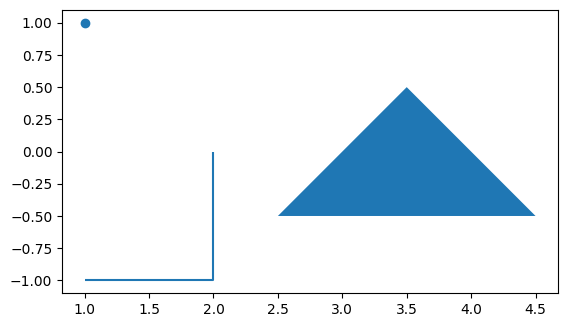

In [ ]:
s1.rotate(90).plot()

<Axes: >

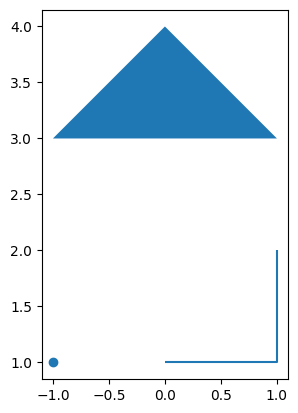

In [ ]:
s1.rotate(90, origin=(0,0)).plot()

<Axes: >

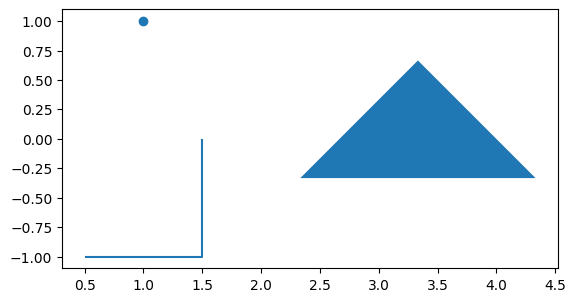

In [ ]:
s1.rotate(90, origin="centroid").plot()

.scale()

<Axes: >

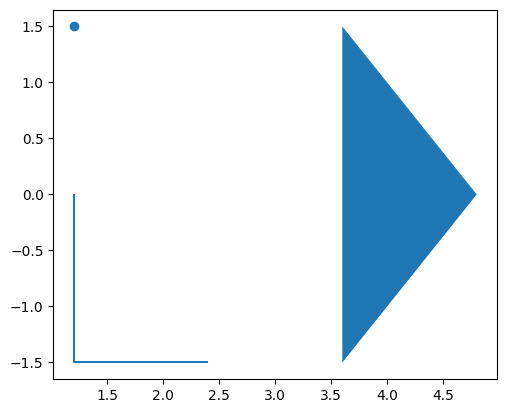

In [ ]:
s1.scale(1.2,1.5, origin=(0,0)).plot()

<Axes: >

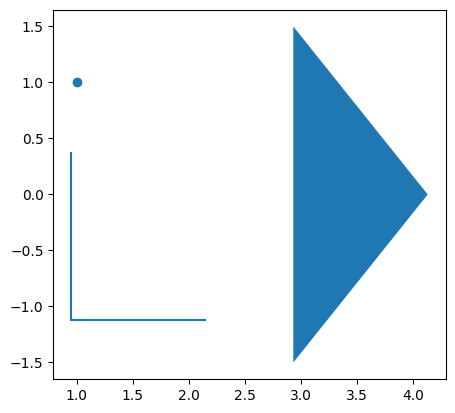

In [ ]:
s1.scale(1.2,1.5, origin="centroid").plot()

.skew()

<Axes: >

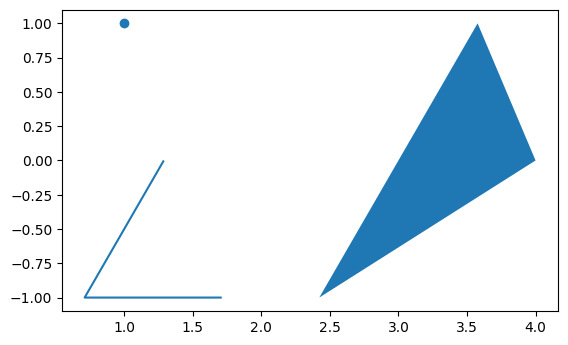

In [ ]:
s1.skew(30).plot()

<Axes: >

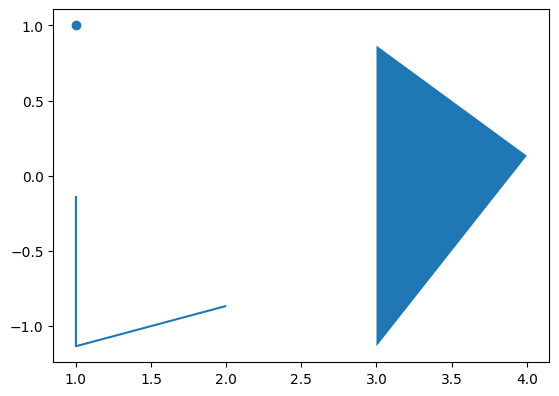

In [ ]:
s1.skew(0,15).plot()

<Axes: >

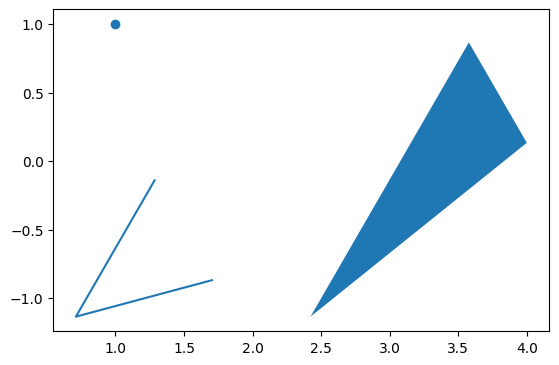

In [ ]:
s1.skew(30,15).plot()

.translate()

<Axes: >

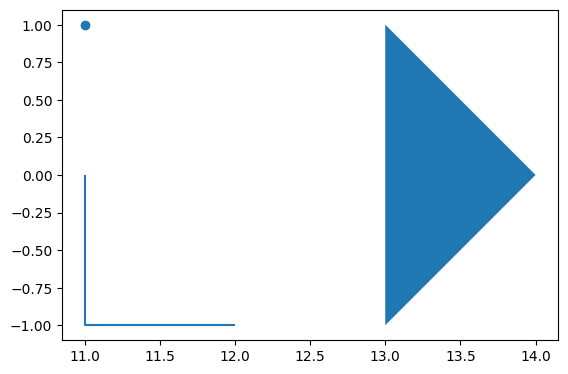

In [ ]:
s1.translate(10).plot()

<Axes: >

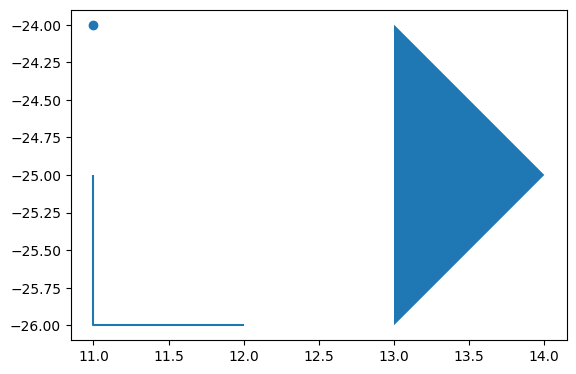

In [ ]:
s1.translate(10,-25).plot()

# Leccion 6: Operaciones

## Operaciones en Conjunto

<Axes: >

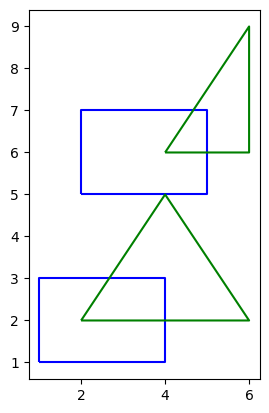

In [ ]:
# Importar todas las librerías con las que vamos a trabajar
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importar la clase Polígono
from shapely.geometry import Polygon

# Creamos nuestros polígonos a partir de los puntos que forman los vértices
cuadrados = geopandas.GeoSeries([Polygon([(1,1), (1,3), (4,3), (4,1)]), Polygon([(2,5), (2,7), (5,7), (5,5)])])
triangulos = geopandas.GeoSeries([Polygon([(2,2), (4,5), (6,2)]), Polygon([(4,6), (6,9), (6,6)])])

# Creamos los dos GeoDataFrames
df_cuadrados = geopandas.GeoDataFrame({'geometry': cuadrados, 'df_cuadrados':[1,2]})
df_triangulos = geopandas.GeoDataFrame({'geometry': triangulos, 'df_triangulos':[1,2]})

# Dibujamos los contornos de cuadrados en azul y de triángulos en verde
ax = df_cuadrados.boundary.plot(color='blue')
df_triangulos.boundary.plot(ax=ax, color='green')

Unión

<ipython-input-13-20d3cc5655e1>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  union = geopandas.overlay(df_cuadrados, df_triangulos, how="union")


<Axes: >

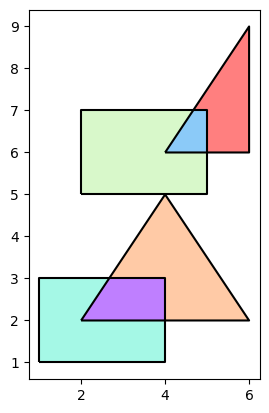

In [ ]:
union = geopandas.overlay(df_cuadrados, df_triangulos, how="union")
ax = union.plot(alpha=0.5, cmap="rainbow")

df_cuadrados.boundary.plot(ax=ax, color="black")
df_triangulos.boundary.plot(ax=ax, color="black")

Intersección

<ipython-input-14-45c3a6d56759>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  union = geopandas.overlay(df_cuadrados, df_triangulos, how="intersection")


<Axes: >

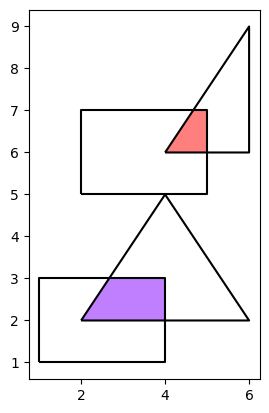

In [ ]:
union = geopandas.overlay(df_cuadrados, df_triangulos, how="intersection")
ax = union.plot(alpha=0.5, cmap="rainbow")

df_cuadrados.boundary.plot(ax=ax, color="black")
df_triangulos.boundary.plot(ax=ax, color="black")

Diferencia

<Axes: >

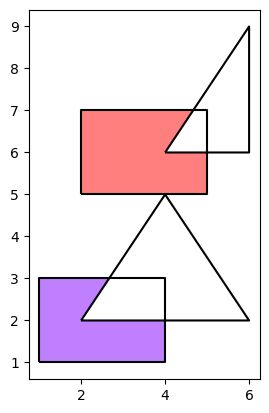

In [ ]:
union = geopandas.overlay(df_cuadrados, df_triangulos, how="difference")
ax = union.plot(alpha=0.5, cmap="rainbow")

df_cuadrados.boundary.plot(ax=ax, color="black")
df_triangulos.boundary.plot(ax=ax, color="black")

<Axes: >

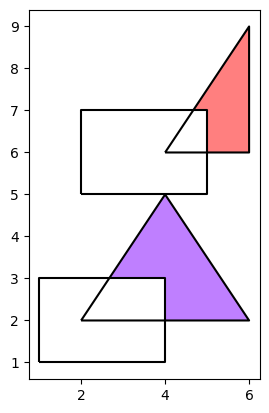

In [ ]:
union = geopandas.overlay(df_triangulos, df_cuadrados, how="difference")
ax = union.plot(alpha=0.5, cmap="rainbow")

df_cuadrados.boundary.plot(ax=ax, color="black")
df_triangulos.boundary.plot(ax=ax, color="black")

Diferencia simétrica

<Axes: >

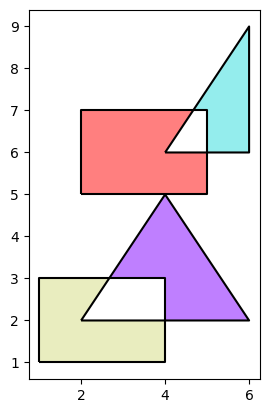

In [ ]:
union = geopandas.overlay(df_triangulos, df_cuadrados, how="symmetric_difference")
ax = union.plot(alpha=0.5, cmap="rainbow")

df_cuadrados.boundary.plot(ax=ax, color="black")
df_triangulos.boundary.plot(ax=ax, color="black")

Es muy importante que se importen los objetos de shapely

<Axes: >

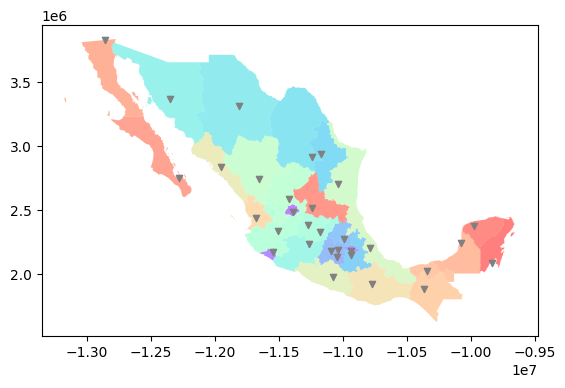

In [ ]:
from shapely.geometry import Polygon, Point, LineString

# Cargamos los datos de los estados
estados = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/DataSets/Mapa_mex/mexican-states.shp' )

# Cargamos los datos de las capitales
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/mexican-capitals.csv' )
capitales = geopandas.GeoDataFrame(df,geometry = geopandas.points_from_xy(df.Long,df.Lat), crs = "epsg:4326")

# Aseguramos que sea el mismo CRS y que el CRS use metros como medida de distancia
estados = estados.to_crs(epsg=3395)
capitales = capitales.to_crs(epsg=3395)

# Pintamos el mapa base
mapa = estados.plot(alpha=0.5, cmap="rainbow")

# Pintamos los puntos correspondientes a las capitales del país
capitales.plot(ax = mapa, marker='v', color='gray', markersize=20)

<Axes: >

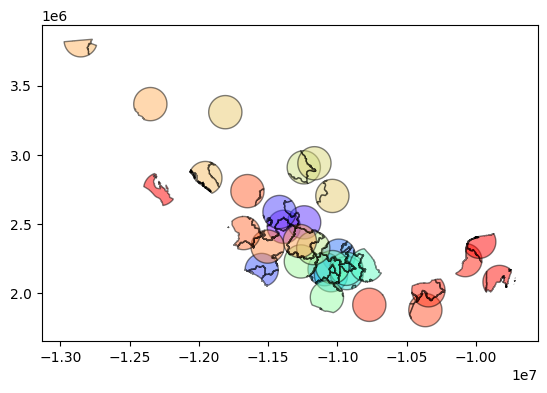

In [ ]:
# # Lo primero es crear un buffer de 120 km (el radio que estamos buscando)
# capitales['geometry']= capitales.buffer(120000)

# Ahora graficamos solamente la intersección de los estados con
# los círculos creados a partir de la localización de las capitales
zonas_urbanas = geopandas.overlay(estados, capitales, how='intersection')

zonas_urbanas.plot(alpha=0.5, edgecolor='k', cmap="rainbow")

<Axes: >

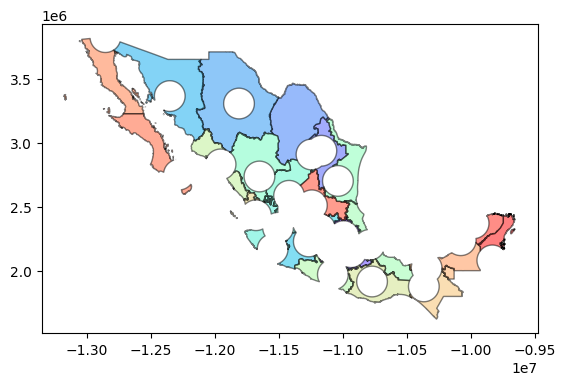

In [ ]:
# Ahora graficamos solamente la intersección de los estados con
# los círculos creados a partir de la localización de las capitales
zonas_urbanas = geopandas.overlay(estados, capitales, how='difference')

zonas_urbanas.plot(alpha=0.5, edgecolor='k', cmap="rainbow")

## Fusión de Datos

Adjuntar (Append)

In [ ]:
# Cargamos los datos de los estados
estados = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/DataSets/Mapa_mex/mexican-states.shp')
# Esta vez solo necesitamos algunas columnas
estados = estados.loc[:, ['ISO3166-2', 'name', 'geometry']]
# Separamos cada uno de los siguientes estados
# De esta forma cada uno está representado en un GeoDataFrame diferente
hidalgo = estados.iloc[[6]]
tlaxcala = estados.iloc[[2]]
puebla = estados.iloc[[7]]
morelos = estados.iloc[[4]]
mexico = estados.iloc[[5]]
cdmx = estados.iloc[[3]]

In [ ]:
# Ahora vamos a adjuntar la información de estos 6 GeoDataFrames
# para crear un GeoDataFrame que contenga todos los estados
# de la parte central de la República Mexicana
mx_centro = hidalgo.append(tlaxcala);
mx_centro = mx_centro.append(puebla);
mx_centro = mx_centro.append(morelos);
mx_centro = mx_centro.append(mexico);
mx_centro = mx_centro.append(cdmx);
mx_centro

<ipython-input-123-a75e7a333747>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_centro = hidalgo.append(tlaxcala);
<ipython-input-123-a75e7a333747>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_centro = mx_centro.append(puebla);
<ipython-input-123-a75e7a333747>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_centro = mx_centro.append(morelos);
<ipython-input-123-a75e7a333747>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_centro = mx_centro.append(mexico);
<ipython-input-123-a75e7a333747>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

,ISO3166-2,name,geometry
6,MX-HID,Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564..."
2,MX-TLA,Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
7,MX-PUE,Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381..."
4,MX-MOR,Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."
5,MX-MEX,México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0..."
3,MX-CMX,Ciudad de México,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."


<Axes: >

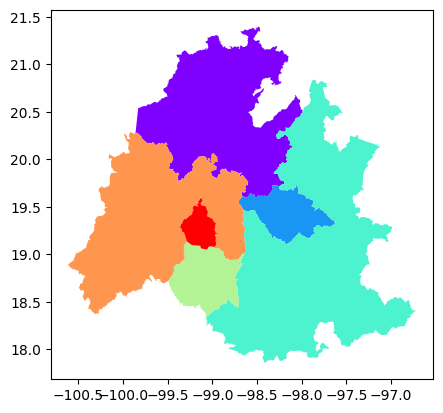

In [ ]:
mx_centro.plot(cmap="rainbow")

Unión por atributos (Attribute join)

Unión Espacial (Spatial Join)

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."


# Examen

In [ ]:
import geopandas
from shapely.geometry import Point, LineString, Polygon
s = geopandas.GeoSeries(
   [
      Point(1, 1),
      LineString([(2, -1),(1, -1), (1, 0)]),
      Polygon([(-1, -1), (0.5, 0), (-1, 1)]),
   ]
)

<Axes: >

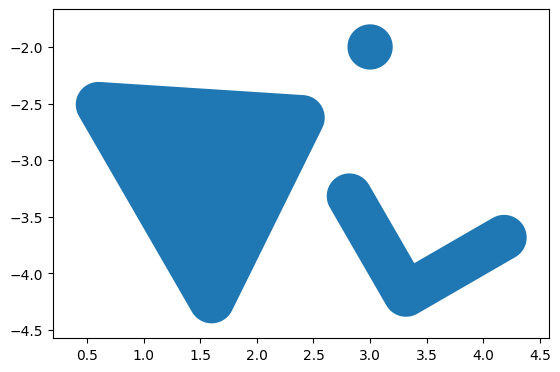

In [ ]:
s2 = s.rotate(30)

s2 = s2.translate(2,-3)

s2 = s2.buffer(0.2)

s2.plot()

<ipython-input-4-2b908cb32672>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_noreste = estados.loc[8:10].append(estados.loc[17:18])
<ipython-input-4-2b908cb32672>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_noroeste = estados.loc[27:28].append(estados.iloc[[11]]).append(estados.iloc[[21]])
<ipython-input-4-2b908cb32672>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_noroeste = estados.loc[27:28].append(estados.iloc[[11]]).append(estados.iloc[[21]])
<ipython-input-4-2b908cb32672>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_centrooeste = estados.loc[12:16].append(estados.loc[0:1]).append(estados.iloc[[23]]).a

<Axes: >

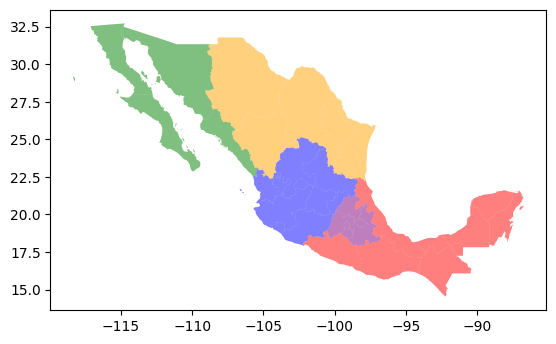

In [ ]:
# Cargamos los datos de los estados
estados = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/DataSets/Mapa_mex/mexican-states.shp' )
# Usamos solo algunas columnas
estados = estados.loc[:, ['ISO3166-2', 'name', 'geometry']]

# Separamos los estados por regiones
# Uniendo todos los segmentos necesarios
mx_centro = estados.loc[2:7]
mx_noreste = estados.loc[8:10].append(estados.loc[17:18])
mx_noroeste = estados.loc[27:28].append(estados.iloc[[11]]).append(estados.iloc[[21]])
mx_centrooeste = estados.loc[12:16].append(estados.loc[0:1]).append(estados.iloc[[23]]).append(estados.iloc[[29]])
mx_sureste = estados.loc[19:20].append(estados.iloc[[22]]).append(estados.loc[24:26]).append(estados.loc[30:31])

# Graficamos por regiones
ax = mx_centro.plot(alpha=0.5, color='purple')
mx_noreste.plot(ax=ax, alpha=0.5, color='orange')
mx_noroeste.plot(ax=ax, alpha=0.5, color='green')
mx_centrooeste.plot(ax=ax, alpha=0.5, color='blue')
mx_sureste.plot(ax=ax, alpha=0.5, color='red')

<Axes: >

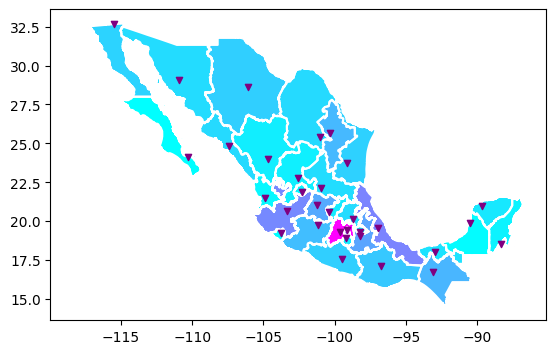

In [ ]:
import pandas as pd
poblacion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/Poblacion_2010.csv')
personas = estados.merge(poblacion, left_on="name", right_on="Entidad Federativa")

capitales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/mexican-capitals.csv')
capitales = geopandas.GeoDataFrame(capitales, geometry = geopandas.points_from_xy(capitales.Long, capitales.Lat))
capitales = capitales.set_crs(estados.crs)

# Graficamos las capitales
mapa = capitales.plot(marker='v', color='purple', markersize=20, zorder=2)
# Graficamos el mapa
personas.plot(ax=mapa, column='Total', cmap='cool')
# Graficamos los bordes de los estados
estados.boundary.plot(ax=mapa, zorder=1, color='white')

In [ ]:
datos = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/DataSets/Poblacion_2010.csv")

datos

,Entidad Federativa,Total,Hombres,Mujeres,geometry
0,Aguascalientes,1184996,576638,608358,None
1,Baja California,3155070,1591610,1563460,None
2,Baja California Sur,637026,325433,311593,None
3,Campeche,822441,407721,414720,None
4,Coahuila de Zaragoza,2748391,1364197,1384194,None
5,Colima,650555,322790,327765,None
6,Chiapas,4796580,2352807,2443773,None
7,Chihuahua,3406465,1692545,1713920,None
8,Ciudad de México,8851080,4233783,4617297,None
9,Durango,1632934,803890,829044,None


<Axes: >

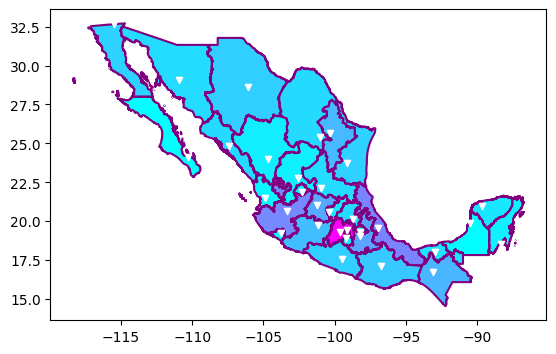

In [ ]:
# Graficamos las capitales
mapa = capitales.plot(marker='v', color='white', markersize=20, zorder=2)
# Graficamos el mapa
personas.plot(ax=mapa, column='Total', cmap='cool')
# Graficamos los bordes de los estados
estados.boundary.plot(ax=mapa, zorder=1, color='purple')

In [ ]:
# Importar todas las librerías con las que vamos a trabajar
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Importar la clase Polígono
from shapely.geometry import Polygon

# Creamos nuestros polígonos a partir de los puntos que forman los vértices
cuadrados = geopandas.GeoSeries([Polygon([(1,1), (1,3), (4,3), (4,1)]), Polygon([(2,5), (2,7), (5,7), (5,5)])])
triangulos = geopandas.GeoSeries([Polygon([(2,2), (4,5), (6,2)]), Polygon([(4,6), (6,9), (6,6)])])

# Creamos los dos GeoDataFrames
df_cuadrados = geopandas.GeoDataFrame({'geometry': cuadrados, 'df_cuadrados':[1,2]})
df_triangulos = geopandas.GeoDataFrame({'geometry': triangulos, 'df_triangulos':[1,2]})

# Obtenemos la intersección usando overlay
interseccion = geopandas.overlay(df_cuadrados, df_triangulos, how='intersection')
ax = interseccion.plot(alpha=0.5, cmap='rainbow')
# Graficamos los contornos de las geometrías originales
df_cuadrados.boundary.plot(ax=ax, color='black')
df_triangulos.boundary.plot(ax=ax, color='black')

<Axes: >

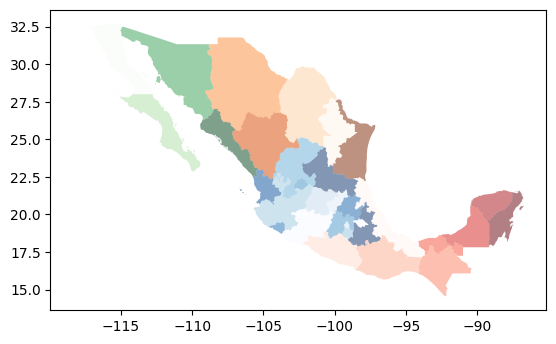

In [ ]:
# Graficamos por regiones
ax = mx_centro.plot(alpha=0.5, cmap='Blues')
mx_noreste.plot(ax=ax, alpha=0.5, cmap='Oranges')
mx_noroeste.plot(ax=ax, alpha=0.5, cmap='Greens')
mx_centrooeste.plot(ax=ax, alpha=0.5, cmap='Blues')
mx_sureste.plot(ax=ax, alpha=0.5, cmap='Reds')

<Axes: >

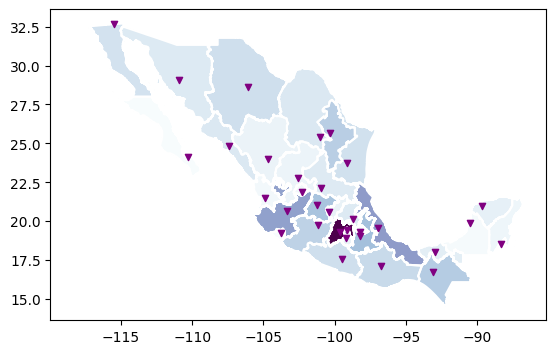

In [ ]:
# Graficamos las capitales
mapa = capitales.plot(marker='v', color='purple', markersize=20, zorder=2)
# Graficamos el mapa
personas.plot(ax=mapa, column='Total', cmap='BuPu')
# Graficamos los bordes de los estados
estados.boundary.plot(ax=mapa, zorder=1, color='white')


# Práctica para el reto

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely

<Axes: >

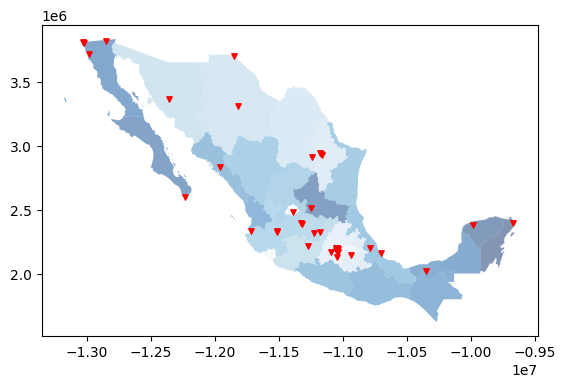

In [36]:
mexico = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/DataSets/Mapa_mex/mexican-states.shp")
base_costco = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/tiendasCostco_.csv")
costco_loc = gpd.GeoDataFrame(base_costco, geometry = gpd.points_from_xy(base_costco[" longitud"], base_costco[" latitud"]))
costco_loc = costco_loc.set_crs(mexico.crs)

mexico = mexico.to_crs(epsg=3395)
costco_loc = costco_loc.to_crs(epsg=3395)

ax = mexico.plot(cmap = "Blues", alpha = 0.5)
costco_loc.plot(markersize = 15, ax = ax, marker="v", color="red")

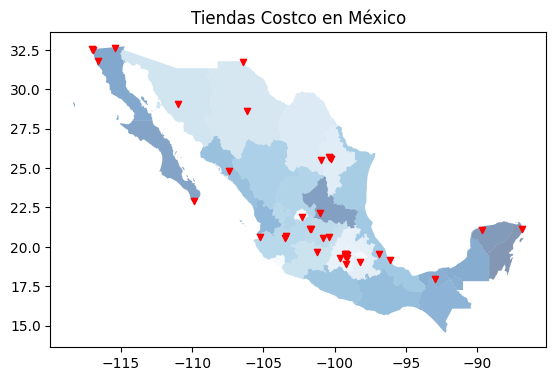

In [21]:
fig, ax = plt.subplots()

ax.set_title("Tiendas Costco en México");
ax.set_aspect("equal");

mexico.plot(cmap="Blues", alpha = 0.5, ax = ax);
costco_loc.plot(markersize=20, ax = ax, marker = "v", color="red");

plt.show()

<Axes: >

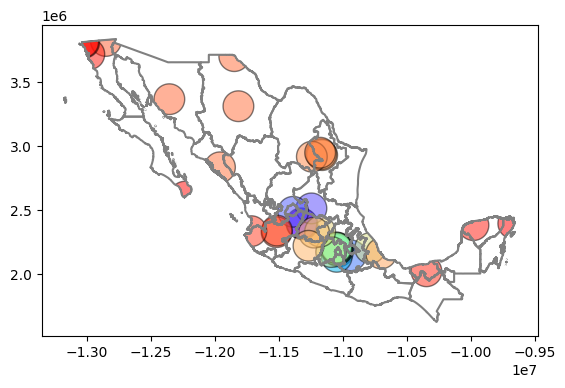

In [40]:
# costco_loc["geometry"] = costco_loc.buffer(120000)

zona_entrega = gpd.overlay(mexico,costco_loc, how="intersection")

ax = mexico.boundary.plot(color="gray")

zona_entrega.plot(cmap="rainbow", ax = ax, edgecolor="k", alpha=0.5)
